## Ethereum price 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('ETH-USD.csv')
# Set the date as index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2015-08-07,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
2015-08-08,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2015-08-09,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2015-08-10,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
2015-08-11,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2021-07-22,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,1.749548e+10
2021-07-23,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,1.620039e+10
2021-07-24,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,1.605745e+10
2021-07-25,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,2191.373779,1.456648e+10


In [14]:
df=df.fillna(df.mean())
future_days=5

In [21]:
# Create a new column contains target 
df[str(future_days)+'_Day_price_forecast']=df[['Close']].shift(-future_days)
# Show the current and future price 
df[['Close',str(future_days)+'_Day_price_forecast']]

,Close,5_Day_price_forecast
2015-08-07,2.772120,1.21744
2015-08-08,0.753325,1.82767
2015-08-09,0.701897,1.82787
2015-08-10,0.708448,1.68890
2015-08-11,1.067860,1.56603
...,...,...
2021-07-22,2025.202759,NaN
2021-07-23,2124.776611,NaN
2021-07-24,2189.218750,NaN
2021-07-25,2191.373779,NaN


In [16]:
# Data Preprocessing
X=np.array(df[['Close']])
X=X[:df.shape[0]-future_days]
print(X)

[[2.77212000e+00]
 [7.53325000e-01]
 [7.01897000e-01]
 ...
 [1.81729663e+03]
 [1.78751074e+03]
 [1.99097083e+03]]


In [17]:
y=np.array(df[str(future_days)+'_Day_price_forecast'])
y=y[:-future_days]
print(y)

[1.21744000e+00 1.82767000e+00 1.82787000e+00 ... 2.18921875e+03
 2.19137378e+03 2.34009082e+03]


In [29]:
#split the data 


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [30]:
# Using the Model to fit the data
from sklearn.linear_model import LinearRegression
lin_mod=LinearRegression().fit(X_train,y_train)


In [35]:
lin_score=lin_mod.score(X_test,y_test)
print('Linear Model accuracy',lin_score)

Linear Model accuracy 0.9592186715033206


In [32]:
lin_prediction=lin_mod.predict(X_test)
print(lin_prediction)

[ 190.16498761  614.69769006  143.71863017   10.78757764  315.28472897
  192.9757161   871.45122825    7.24347485  220.68036487 1986.41204509
 2024.90966042    6.8056481     7.40908378 2162.00447596  232.92798428
    7.74544645  759.41787942  707.53501223  119.76037349   13.5105121
  433.81081567  275.28148644   17.31743772 2068.38315144  180.71842406
  189.402274    448.3713108   605.34845883  225.78735643 2339.83982815
  228.24610971  308.9478438   325.6930742   250.19554358  189.15173103
  141.56350488  215.76543966  389.69532782  307.77979729  172.52903949
  193.71417948  412.52799407  312.70049124  231.83490263  384.12987258
  179.14811165  230.90406739  484.54409993  209.23144583  234.33062984
 1612.73358651   85.00902088   14.1999257    16.61666972  245.68092588
   18.489       187.10277577   17.67498662  697.13793382   19.48143954
  194.70119757  155.99977639   12.35673272  513.63320434  698.79777377
  469.95554424  819.34241761  172.67897021    7.23226674 2604.58498944
    7.9

In [33]:
print(y_test)

[1.86355194e+02 5.57174988e+02 1.49135010e+02 5.28835000e+00
 3.20058899e+02 1.71629425e+02 8.57224976e+02 8.35500000e-01
 1.70654999e+02 2.07965747e+03 2.08857373e+03 6.16039000e-01
 8.99050000e-01 2.21162573e+03 2.40984985e+02 1.14770000e+00
 9.97719971e+02 6.90827026e+02 1.23321152e+02 9.31127000e+00
 3.95835144e+02 2.50930359e+02 1.24167000e+01 2.43510498e+03
 1.82021561e+02 1.87976547e+02 4.60149841e+02 5.45797363e+02
 2.29255005e+02 2.40353516e+03 2.29392197e+02 3.34586639e+02
 3.37631012e+02 3.09643616e+02 2.12339081e+02 1.36443619e+02
 1.74001007e+02 3.94961945e+02 2.73303009e+02 1.63051178e+02
 1.80559601e+02 3.99921478e+02 3.11226105e+02 2.12728516e+02
 3.70285004e+02 1.62402786e+02 2.19629608e+02 4.50852997e+02
 1.97246994e+02 2.43015961e+02 1.84353259e+03 9.43984990e+01
 7.16615000e+00 1.12454000e+01 2.28494003e+02 1.15320000e+01
 1.89236938e+02 1.12289000e+01 7.53591980e+02 1.28543000e+01
 2.28578568e+02 1.16897804e+02 4.31529000e+00 5.70686646e+02
 8.26822998e+02 4.560310

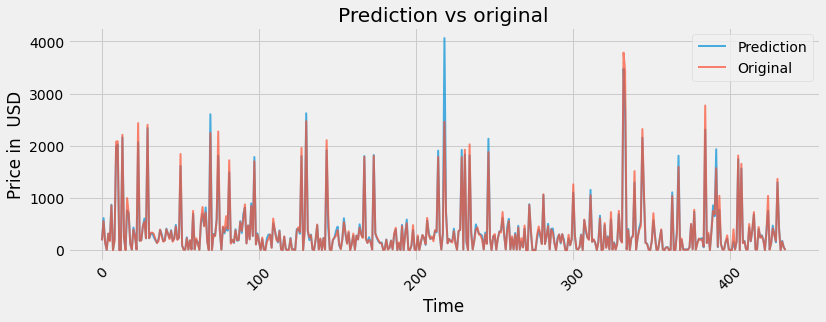

In [34]:
plt.figure(figsize=(12,4))
plt.plot(lin_prediction,label='Prediction',lw=2,alpha=.7)
plt.plot(y_test,label='Original',lw=2,alpha=.7)
plt.title("Prediction vs original")
plt.ylabel('Price in  USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Here it ends with plot